## 2do Parcial - Simulación Computacional 2019-II

## 1.  (1.25 punto)
En simulación de eventos discretos ¿Cómo es el tipo de evolución del tiempo en el mecanismo del reloj?

    a. Asincrónica
    b. Sincrónica
    c. Continua

### solucion punto 1: 
b. sincrónica

## 2.  (1.25 punto)
¿Cuáles son los tres tipos de variables en simulación de eventos discretos?

    a. Estado del sistema, endógenas y exógenas
    b. Tiempo, estado del sistema, tasa de llegada.
    c. Tiempo, conteo y estado del sistema

### solucion punto 2:
c. Tiempo, conteo y estado del sistema.

## 3.  (1.25 punto)
Se tiene un sistema de línea de espera con un servidor y capacidad infinita (Modelo de Colas G/G/1) (Ver [Presentación](https://docs.google.com/presentation/d/17sB_GJVIu0vJYJXovaJNdLuBMENwHMW2L9Sa58P89Uw) ), en el cual tanto los tiempos de llegada entre clientes, así como los tiempos de atención del servidor se comportan como  variables aleatorias generadas de distribuciones de probabilidad exponenciales, en donde en promedio llegan A clientes por minuto al sistema y el servidor atiende en promedio B clientes por minuto. La simulación inicia en el tiempo $t=0$ y se deja de permitir el ingreso de mas clientes en el sistema en el tiempo $T=200$.

Para analizar el sistema Ud. debe usar la implementación de acuerdo con el Modelo de Colas G/G/1 visto en clase (diapositivas 42 y 43 [Presentación](https://docs.google.com/presentation/d/17sB_GJVIu0vJYJXovaJNdLuBMENwHMW2L9Sa58P89Uw) ). 

Para la generación de las variables aleatorias con distribución exponencial debe usar el método de la inversión para variables aleatorias continuas usando generadores congruenciales mixtos. _Ayuda: El método de inversión para variables aleatorias continuas debe usar la función inversa $F^{-1}(p)$ de la distribución de probabilidad acumulada de la distribución exponencial en donde el valor $p$ proviene del generador congruencial mixto_.

Para la generación de las variables aleatorias de los tiempos entre las llegadas de clientes (variable aleatoria $X$) debe generar variables aleatorias continuas de una distribución exponencial con $\lambda = A$ a partir de un generador congruencial Turbo Pascal (i.e. $a = 134775813$, $c = 1$, $m=2^{32}$) y semilla $X_0 = 2022020$.

Para la generación de las variables aleatorias de los tiempos de atención del servidor (variable aleatoria $Y$) debe generar variables aleatorias continuas de una distribución exponencial con $\lambda = B$ a partir de un generador congruencial Microsoft Visual Basic (i.e. $a = 1140671485$, $c = 12820163$, $m=2^{24}$) y semilla $X_0 = 1234567890$.

Con su implementación para $A=6$ y $B=9$ por favor responda lo siguiente:

    a. Tiempo promedio de los clientes en el sistema.
    b. Tiempo promedio de los clientes en la cola.
    c. Tiempo transcurrido desde $T$ hasta que el último cliente abandona el sistema.
    d. Número máximo de clientes en el sistema durante la simulación.

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

Xant1 = 2022020
Xant2 = 1234567890

M = 99999.0
T = 200.0
at = []
an = []
LLt = []
St = []

def gencongru1(): 
    global Xant1
    a = 134775813
    c = 1
    m = 2**32
    Xnext = (a * Xant1 + c) % m
    Xant1 = Xnext
    U = Xnext / m
    return U

def gencongru2():
    global Xant2
    a = 1140671485
    c = 12820163
    m = 2**24
    Xnext = (a * Xant2 + c) % m
    Xant2 = Xnext
    U = Xnext / m
    return U

def GenerarX():
    vlambda = 6
    U = gencongru1()
    X = -(math.log(1-U))/float(vlambda)
    return X

def GenerarY():
    vlambda = 9
    U = gencongru2()
    Y = -(math.log(1-U))/float(vlambda)
    return Y

def Llegada(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t=tsuc
    n = n + 1
    LLt.append(t)
    at.append(t)
    an.append(n)
    
    NLL = NLL + 1
    LL.append(t)
    
    X = GenerarX()
    
    if (t+X) < T:
        TSuc['tLL'] = t + X
    if n==1:
        Y = GenerarY()
        TSuc['tS'] = t + Y
        #Serv[NS]=Y 
        Serv.append(Y)
        
def Servidor(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t = tsuc
    n = n - 1
    
    St.append(t)
    at.append(t)
    an.append(n)
    
    NS = NS + 1
    S.append(t)

    if n>0:
        Y = GenerarY()
        TSuc['tS'] = t + Y
        Serv.append(Y) 
    
t = tsuc = NLL = NS = n = 0

at.append(t)
an.append(n)

TSuc = {"tLL":M, "tS":M}

LL = []
S = []
Serv = []
LL.append(0.0)
S.append(0.0)
Serv.append(0.0)

X = GenerarX()

if X > T:
    Tp = t_med_sistema = t_med_cola = 0.0
    exit
else:
    Llegada(X)
    while((TSuc['tLL'] != M)|(TSuc['tS']!=M)):
        if TSuc['tLL'] < TSuc['tS']:
            tsuc = TSuc['tLL']
            TSuc['tLL'] = M
            Llegada(tsuc)
            
        if TSuc['tS'] < TSuc['tLL']:
            tsuc = TSuc['tS']
            TSuc['tS'] = M
            Servidor(tsuc)

    Tp = max(0,t-T)
    acumulo1 = acumulo2 = 0.0
    ind = 0
    
    while ind < NLL:
        acumulo1 = acumulo1 + S[ind] - LL[ind]
        acumulo2 = acumulo2 + S[ind] - LL[ind] - Serv[ind]
        ind = ind + 1
    t_med_sistema = acumulo1/NLL
    t_med_cola = acumulo2/NLL

    exit

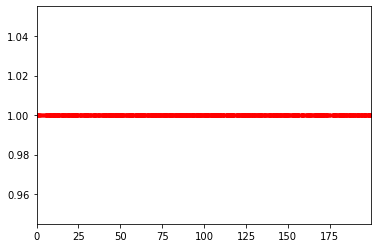

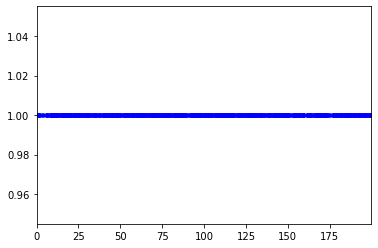

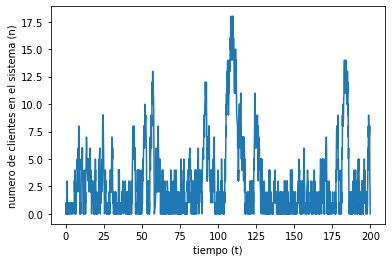

Tiempo medio de los clientes en el sistema:  0.45879732349915964
Tiempo medio de los clientes en la cola:  0.3417052652115768
Tiempo transcurrido desde T hasta que el último cliente abandona el sistema:  0
Número máximo de clientes en el sistema:  18
Total de clientes que pasaron por el sistema:  1211


In [5]:

at = np.array(at)
an = np.array(an)

LLt = np.array(LLt)
St = np.array(St)

tmp = np.zeros((len(LLt)))+1

plt.plot(LLt, tmp, 'r.')
plt.xlim(0, max(at))
plt.show()

tmp = np.zeros((len(St)))+1

plt.plot(St, tmp, 'b.')
plt.xlim(0, max(at))
plt.show()

plt.plot(at,an)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el sistema (n)')
plt.show()

print("Tiempo medio de los clientes en el sistema: ",t_med_sistema)
print("Tiempo medio de los clientes en la cola: ",t_med_cola)
print("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: ",Tp)
print("Número máximo de clientes en el sistema: ",max(an))
print("Total de clientes que pasaron por el sistema: ",NLL)

## 4.  (1.25 punto)
Usando el siguiente código basado en el ejemplo de "Movie Renege" de Simpy (https://simpy.readthedocs.io/en/latest/examples/movie_renege.html), modifique el código para que cumpla las siguientes condiciones:

    - El máximo número de personas por película sea de 45
    - El tiempo de simulación sea de 105 minutos
    - Si quedan menos de 3 tiquetes despues de una compra de tiquete, la señal de agotado será activada 
    - Disminuya de 30 a 24 segundos el tiempo que discuten los asistentes al cine que estan en la fila cuando aparece el aviso de agotado.
    - Los asistentes al cine llegan en tiempos aleatorios e intentan comprar un numero aleatorio de tiquetes entre 1 y 8  

Ejecute la versión modifica y responda:

    a. ¿Cuántas personas abandonan la fila luego de que los tiquetes para la película "Bad Boys para siempre" estan agotados?
    b. ¿Cuánto tiempo paso desde la apertura del mostrador hasta que se agotaron los tiquetes para la película "Parásito"?
    c. ¿Cuál fue la primera película en agotarse?

In [9]:
"""
Movie renege example

Covers:

- Resources: Resource
- Condition events
- Shared events

Scenario:
  A movie theatre has one ticket counter selling tickets for three
  movies (next show only). When a movie is sold out, all people waiting
  to buy tickets for that movie renege (leave queue).

"""
import collections
import random

import simpy


RANDOM_SEED = 2020
TICKETS = 45  # Number of tickets per movie
SIM_TIME = 105  # Simulate until


def moviegoer(env, movie, num_tickets, theater):
    """A moviegoer tries to by a number of tickets (*num_tickets*) for
    a certain *movie* in a *theater*.

    If the movie becomes sold out, she leaves the theater. If she gets
    to the counter, she tries to buy a number of tickets. If not enough
    tickets are left, she argues with the teller and leaves.

    If at most one ticket is left after the moviegoer bought her
    tickets, the *sold out* event for this movie is triggered causing
    all remaining moviegoers to leave.

    """
    with theater.counter.request() as my_turn:
        # Wait until its our turn or until the movie is sold out
        result = yield my_turn | theater.sold_out[movie]

        # Check if it's our turn of if movie is sold out
        if my_turn not in result:
            theater.num_renegers[movie] += 1
            env.exit()

        # Check if enough tickets left.
        if theater.available[movie] < num_tickets:
            # Moviegoer leaves after some discussion
            yield env.timeout(0.4)
            env.exit()

        # Buy tickets
        theater.available[movie] -= num_tickets
        if theater.available[movie] < 3:
            # Trigger the "sold out" event for the movie
            theater.sold_out[movie].succeed()
            theater.when_sold_out[movie] = env.now
            theater.available[movie] = 0
        yield env.timeout(1)


def customer_arrivals(env, theater):
    """Create new *moviegoers* until the sim time reaches 120."""
    while True:
        yield env.timeout(random.expovariate(1 / 0.5))

        movie = random.choice(theater.movies)
        num_tickets = random.randint(1, 8)
        if theater.available[movie]:
            env.process(moviegoer(env, movie, num_tickets, theater))


Theater = collections.namedtuple('Theater', 'counter, movies, available, '
                                            'sold_out, when_sold_out, '
                                            'num_renegers')


# Setup and start the simulation
print('Abandono de pelicula')
random.seed(RANDOM_SEED)
env = simpy.Environment()

# Create movie theater
counter = simpy.Resource(env, capacity=1)
movies = ['Bad Boys para siempre', 'Parásito', 'Jumanji: El siguiente nivel']
available = {movie: TICKETS for movie in movies}
sold_out = {movie: env.event() for movie in movies}
when_sold_out = {movie: None for movie in movies}
num_renegers = {movie: 0 for movie in movies}
theater = Theater(counter, movies, available, sold_out, when_sold_out,
                  num_renegers)

# Start process and run
env.process(customer_arrivals(env, theater))
env.run(until=SIM_TIME)

# Analysis/results
for movie in movies:
    if theater.sold_out[movie]:
        print('La película "%s" se agotó %.1f minutos después de la apertura del '
              'mostrador.' % (movie, theater.when_sold_out[movie]))
        print('  Numero de gente dejando la fila cuando la pelicula esta agotada: %s' %
              theater.num_renegers[movie])

Abandono de pelicula
La película "Bad Boys para siempre" se agotó 34.1 minutos después de la apertura del mostrador.
  Numero de gente dejando la fila cuando la pelicula esta agotada: 5
La película "Parásito" se agotó 35.9 minutos después de la apertura del mostrador.
  Numero de gente dejando la fila cuando la pelicula esta agotada: 11
La película "Jumanji: El siguiente nivel" se agotó 31.3 minutos después de la apertura del mostrador.
  Numero de gente dejando la fila cuando la pelicula esta agotada: 4


#### ¿Cuántas personas abandonan la fila luego de que los tiquetes para la película "Bad Boys para siempre" estan agotados?
la cantidad de personas que abadonan la fila despues de agotado los tickets es de 5.

#### ¿Cuánto tiempo paso desde la apertura del mostrador hasta que se agotaron los tiquetes para la película "Parásito"?
pasaron 35.9 minutos para que se agotaran los tickets de la pelicula parasito

#### ¿Cuál fue la primera película en agotarse?
la pelicula que mas rapido se agoto fue Jumanji.